# APS 4

Software para análise de treliças planas.

Arquivo de entrada: `entrada.xlsx`

Arquivo de saída: `saida.xlsx`

___

In [70]:
# Importando bibliotecas necessárias

from funcoesTermosol import *
import numpy as np
import math

Ao importar os **dados de entrada**, temos: 

- nn $\rightarrow$ número de nós

- N $\rightarrow$ matriz dos nós

- nm $\rightarrow$ número de membros

- Inc $\rightarrow$ matriz de incidência

    - Colunas : 

    - Nó 1

    - Nó 2

    - E em $Pa$

    - Área em $m^2$

- nc $\rightarrow$ número de cargas

- F $\rightarrow$ forças (Vetor de carregamento)

- nr $\rightarrow$ número de restrições

- R $\rightarrow$ restrições (Vetor com os graus de liberdade)


In [71]:
# Importando dados de entrada e printando

[nn,N,nm,Inc,nc,F,nr,R] = importa('entrada.xls')
print("Número de nós :", nn)
print("")
print("-------------------------")
print("Matriz dos nós :\n")
print(N)
print("")
print("-------------------------")
print("Número de membros :", nm)
print("")
print("-------------------------")
print("Matriz de incidência :\n")
print(Inc)
print("")
print("-------------------------")
print("Número de cargas :", nc)
print("")
print("-------------------------")
print("Vetor de cargas :\n")
print(F)
print("")
print("-------------------------")
print("Número de restrições :", nr)
print("")
print("-------------------------")
print("Vetor de restrições :\n")
print(R)


Número de nós : 3

-------------------------
Matriz dos nós :

[[0.  0.  0.3]
 [0.  0.4 0.4]]

-------------------------
Número de membros : 3

-------------------------
Matriz de incidência :

[[1.0e+00 2.0e+00 2.1e+11 2.0e-04]
 [2.0e+00 3.0e+00 2.1e+11 2.0e-04]
 [3.0e+00 1.0e+00 2.1e+11 2.0e-04]]

-------------------------
Número de cargas : 2

-------------------------
Vetor de cargas :

[[   0.]
 [   0.]
 [   0.]
 [   0.]
 [ 150.]
 [-100.]]

-------------------------
Número de restrições : 3

-------------------------
Vetor de restrições :

[[0.]
 [2.]
 [3.]]


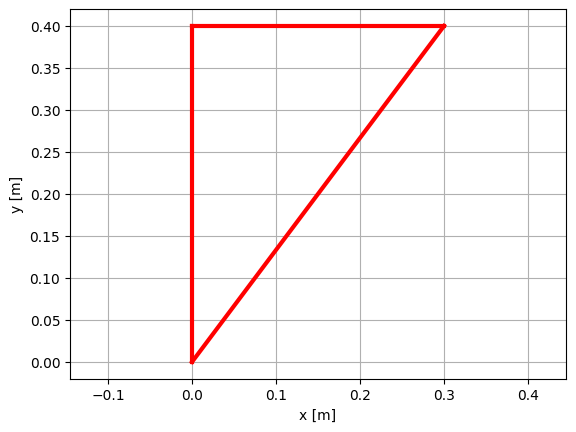

In [72]:
# Função que cria imagem da estrutura

plota(N,Inc)

___

## Pré-processamento

Uma vez demonstrados e importados os dados necessários, podemos começar o **pré-processamento dos dados**. Para isso, seguiremos os seguintes passos: 

1. Montar a matriz de conectividade

2. Montar a matriz de rigidez de cada elemento

3. Montar a matriz de rigidez global da treliça

4. Montar o vetor de carregamento global (vetor de forças)

5. Aplicar as condições de contorno nas matrizes de rigidez e de forças


In [73]:
# Credits to braingineer https://gist.github.com/braingineer/d801735dac07ff3ac4d746e1f218ab75
def matprint(mat, fmt="g"):        
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

**Fazendo Matriz Global a partir das locais**



In [74]:
'''
Dentro do for, serão criadas as matrizes de rigidez de cada elemento.

A partir disto, ao final, iremos somando até que quando sair do loop, 
teremos a matriz de rigidez global.

'''

kglobal = np.zeros((nn*2,nn*2))

for elemento in range(nm):

    no1 = int(Inc[elemento,0]) -1
    no2 = int(Inc[elemento,1]) -1

    E = Inc[elemento,2]
    A = Inc[elemento,3]

    L = np.sqrt((N[0,no2]-N[0,no1])**2+(N[1,no2]-N[1,no1])**2)
    c2 = ((N[0,no2]-N[0,no1])/L)**2
    s2 = ((N[1,no2]-N[1,no1])/L)**2
    cs = ((N[0,no2]-N[0,no1])*(N[1,no2]-N[1,no1]))/(L**2)
    print("L = ",L)


    klocal = np.array([[c2,cs,-c2,-cs],[cs,s2,-cs,-s2],[-c2,-cs,c2,cs],[-cs,-s2,cs,s2]])
   
 
    klocal = (E*A/L)*klocal
    list_dot = [2*no1, 2*no1+1, 2*no2, 2*no2+1]
    

    kglobal[np.ix_(list_dot,list_dot)] += klocal

print("\nMatriz de rigidez global")
matprint(kglobal)

L =  0.4
L =  0.3
L =  0.5

Matriz de rigidez global
 3.024e+07   4.032e+07         0          0  -3.024e+07  -4.032e+07  
 4.032e+07  1.5876e+08         0  -1.05e+08  -4.032e+07  -5.376e+07  
         0           0   1.4e+08          0    -1.4e+08           0  
         0   -1.05e+08         0   1.05e+08           0           0  
-3.024e+07  -4.032e+07  -1.4e+08          0  1.7024e+08   4.032e+07  
-4.032e+07  -5.376e+07         0          0   4.032e+07   5.376e+07  


Agora, visto que temos restrições, precisamos aplicar as **condições de contorno** nas matrizes de rigidez e de forças. Feito isso, ambas as matrizes estarão prontas para serem resolvidas.

**OBS:** Suas formas reduzidas são armazenadas em novas variáveis.

In [75]:
kglobalred = kglobal.copy()

kglobalred = np.delete(kglobalred, R.astype(int), 0)
kglobalred =np.delete(kglobalred, R.astype(int), 1)
Fred = F.copy()
Fred = np.delete(Fred, R.astype(int), 0)
print("Matriz de rigidez global reduzida")
print("")
matprint(kglobalred)
print("--------------------------------------")
print("\nVetor de forcas reduzido")
print("")
matprint(Fred)

Matriz de rigidez global reduzida

1.5876e+08  -4.032e+07  -5.376e+07  
-4.032e+07  1.7024e+08   4.032e+07  
-5.376e+07   4.032e+07   5.376e+07  
--------------------------------------

Vetor de forcas reduzido

   0  
 150  
-100  


___

Após aplicadas as condições de contorno, temos o fim da nossa etapa de pré-processamento. Agora, podemos partir para a etapa de **resolução**. Para isso, seguiremos os seguintes passos:

1. Aplicar um método numérico para resolver o sistema de equações e obter os deslocamentos nodais

    - **OBS :** Para esta etapa, utilizaremos o método de Gauss-Seidel

2. Calcular a deformação em cada elemento

3. Calcular a tensão em cada elemento

4. Determinar as reações de apoio 

In [76]:
'''
O método numérico a ser aplicado, Gauss-Seidel, é um método iterativo, e já 
possui uma função pronta, dada no arquivo base 'funcoesTermosol.py'.

'''

u = gauss_seidel(kglobalred, Fred, 100, 0.0001)
print("\n--------------------------------------")
print("Vetor de deslocamentos:")
print("")
print(u)


Iterações: 10

--------------------------------------
Vetor de deslocamentos:

[[-9.52325199e-07]
 [ 1.60708865e-06]
 [-4.01776073e-06]]


**Note que...** neste trecho a seguir, iremos "consertar" nosso vetor de deslocamento para torná-lo "global", ou seja, com o mesmo tamanho do vetor de forças. Para isso, basta adicionar zeros nas posições que correspondem aos graus de liberdade que foram restringidos.

In [77]:
Utotal = np.zeros(nn*2)
j=0
for i in range(nn*2):
    if i in R.astype(int):
        Utotal[i] = 0
    else:
        Utotal[i] = u[j]
        j+=1

print(Utotal)


[ 0.00000000e+00 -9.52325199e-07  0.00000000e+00  0.00000000e+00
  1.60708865e-06 -4.01776073e-06]


In [78]:
'''
Neste for, iremos calcular tanto a deformação quanto a tensão de cada elemento.

'''
listadefo = []
listatensao = []
listafint = []
for elemento in range(nm):
    no1 = int(Inc[elemento,0]) -1
    no2 = int(Inc[elemento,1]) -1
    E = Inc[elemento,2]
    A = Inc[elemento,3]
    L = np.sqrt((N[0,no2]-N[0,no1])**2+(N[1,no2]-N[1,no1])**2)
    c = ((N[0,no2]-N[0,no1])/L)
    s = ((N[1,no2]-N[1,no1])/L)
   
    list_dot = [Utotal[2*no1], Utotal[2*no1+1], Utotal[2*no2], Utotal[2*no2+1]]

    K = np.array([-c , -s , c , s])/L

    defo = 0
    for i in range(4):
        defo += K[i]*list_dot[i]

    tensao = E*defo
    fint = tensao*A
    listadefo.append(defo)
    listatensao.append(tensao)
    listafint.append(fint)
    print ("\n--------------------------------------")
    print("Deformacao no elemento ",elemento+1," = ",defo)
    print("Tensao no elemento ",elemento+1," = ",tensao)
print(listadefo)
print(listatensao)
print(listafint)



--------------------------------------
Deformacao no elemento  1  =  2.38081299653057e-06
Tensao no elemento  1  =  499970.7292714197

--------------------------------------
Deformacao no elemento  2  =  5.3569621518444336e-06
Tensao no elemento  2  =  1124962.051887331

--------------------------------------
Deformacao no elemento  3  =  -2.976190476190475e-06
Tensao no elemento  3  =  -624999.9999999998
[2.38081299653057e-06, 5.3569621518444336e-06, -2.976190476190475e-06]
[499970.7292714197, 1124962.051887331, -624999.9999999998]
[99.99414585428394, 224.99241037746623, -124.99999999999996]


In [79]:
'''
Tendo os deslocamentos, podemos calcular as reações de apoio.

'''

Reacao = kglobal.dot(Utotal)
reacaored = []

for i in range(nn*2):
    if i in R.astype(int):
        reacaored.append(Reacao[i])

print("--------------------------------------")
print("Vetor de reacoes")
print("")
print(Reacao)

print("\n--------------------------------------")
print("Vetor de reacoes reduzido")
print("")
print(reacaored)

--------------------------------------
Vetor de reacoes

[ 7.50000000e+01  5.85414572e-03 -2.24992410e+02  9.99941459e+01
  1.49992410e+02 -1.00000000e+02]

--------------------------------------
Vetor de reacoes reduzido

[74.99999999999997, -224.9924103774662, 99.99414585428393]


___

## Pós-processamento

Agora, com os deslocamentos nodais, as deformações e as tensões em cada elemento, podemos partir para a etapa de **pós-processamento**. Nesta parte, apenas iremos imprimir os resultados em um arquivo de saída do tipo `.txt`.

Além disso, também iremos plotar a mesma imagem da treliça demonstrada anteriormente, porém agora com os deslocamentos já aplicados.

In [80]:
''' 
Transportando todos os dados necessários para um arquivo de saída.

'''

with open ("saida.txt", "w") as arquivo:

    # Escrevendo as reacoes de apoio
    arquivo.write("Reacoes de apoio [n]\n")
    arquivo.write("[")
    for i in range(len(reacaored)):
        arquivo.write("[")
        arquivo.write(str(reacaored[i]))
        if i == len(reacaored)-1:
            arquivo.write("]]")
        else :
            arquivo.write("]\n")
    arquivo.write("")

    # Escrevendo os deslocamentos
    arquivo.write("\n\nDeslocamentos [m]\n")
    arquivo.write("[")
    for i in range(len(Utotal)):
        arquivo.write("[")
        arquivo.write(str(Utotal[i]))
        if i == len(Utotal)-1:
            arquivo.write("]]")
        else :
            arquivo.write("]\n")
    arquivo.write("\n")

    # Escrevendo as deformacoes
    arquivo.write("\n\nDeformacoes []\n")
    arquivo.write("[")
    for i in range(nm):
        arquivo.write("[")
        arquivo.write(str(listadefo[i]))
        if i == nm-1:
            arquivo.write("]]")
        else :
            arquivo.write("]\n")
    arquivo.write("\n")

    # Escrevendo as forcas internas
    arquivo.write("\n\nForcas internas [N]\n")
    arquivo.write("[")
    for i in range(nm):
        arquivo.write("[")
        arquivo.write(str(listafint[i]))
        if i == nm-1:
            arquivo.write("]]")
        else :
            arquivo.write("]\n")
    arquivo.write("\n")

    # Escrevendo as tensoes
    arquivo.write("\n\nTensoes internas [Pa]\n")
    arquivo.write("[")
    for i in range(nm):
        arquivo.write("[")
        arquivo.write(str(listatensao[i]))
        if i == nm-1:
            arquivo.write("]]")
        else :
            arquivo.write("]\n")
    arquivo.write("\n")



arquivo.close()



In [82]:
# Gerando a nova imagem mas já com as deformações
# Primeiro aplicar as deformações em uma cópia e depois usar o plota()



TypeError: plota() takes 2 positional arguments but 14 were given